# Plots for _ADDING_ 

> ⚠️ some arguments and names may have changed between running this experiment and the current state of the repo. Please adjust if necessary.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns

from pathlib import Path 
from pinnfluence_resampling.utils.eval_and_plotting_utils import (
    load_problem, 
    METHODS, 
    PROBLEMS, 
    PARAMS, 
    generate_combined_l2_err_plots, 
    create_standalone_legend,
    generate_full_latex_table, 
    calculate_final_metrics,
    create_combined_plot,
    create_separate_legend,
    plot_boxplots,
)

In [2]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)

In [3]:
# check if all runs are present
results = Path("../../results/lbfgs/iterative_add_1000_points/")
results_no_resampling = Path("../../results/lbfgs/no_resampling_1000_points/iterative_add/")
model_zoo = Path("../../../model_zoo_arxiv")
figpath = Path("./figures/")
for problem, _, _ in PROBLEMS['add']:
    df = load_problem(problem, results)

    print(problem)
    sub_df = df.loc[
        (df['Iteration'] == 200000) & 
        (df['distribution_k'] == 2) & 
        (df['distribution_c'] == 0) 
    ]

    # sanity checks
    for strat in sub_df['Strategy'].unique():
        # check if all seeds are present
        if not len(sub_df.loc[sub_df['Strategy'] == strat, 'seed'].unique()) == 10:
            print(f"Not all seeds present for {problem} with strategy {strat}")

        # check for duplicates
        if sub_df.loc[sub_df['Strategy'] == strat].duplicated(subset=['Iteration', 'seed', 'model_name']).any():
            print(f"Duplicates found for {problem} with strategy {strat}")



diffusion
allen_cahn
burgers
wave
drift_diffusion_sine


/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:596: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:596: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:596: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:596: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/si

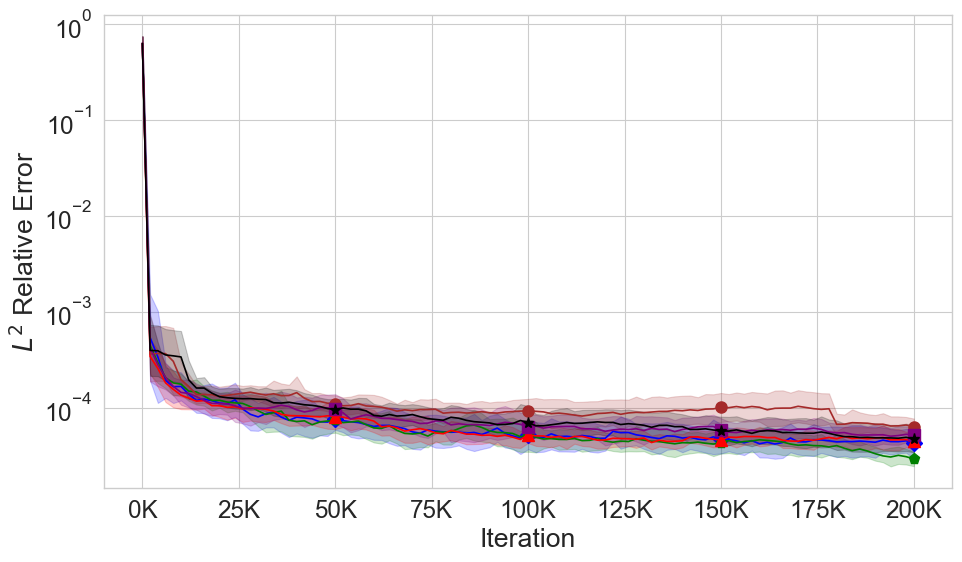

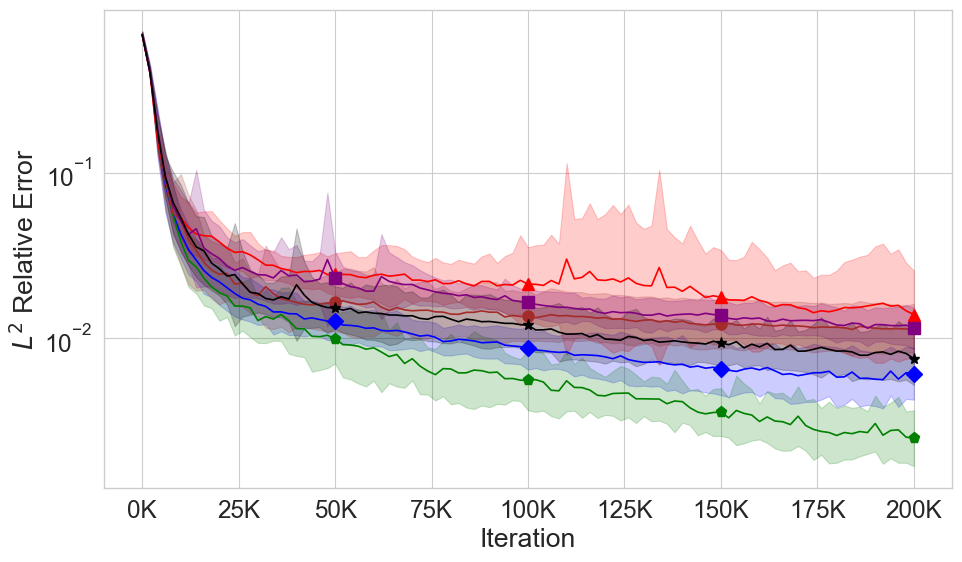

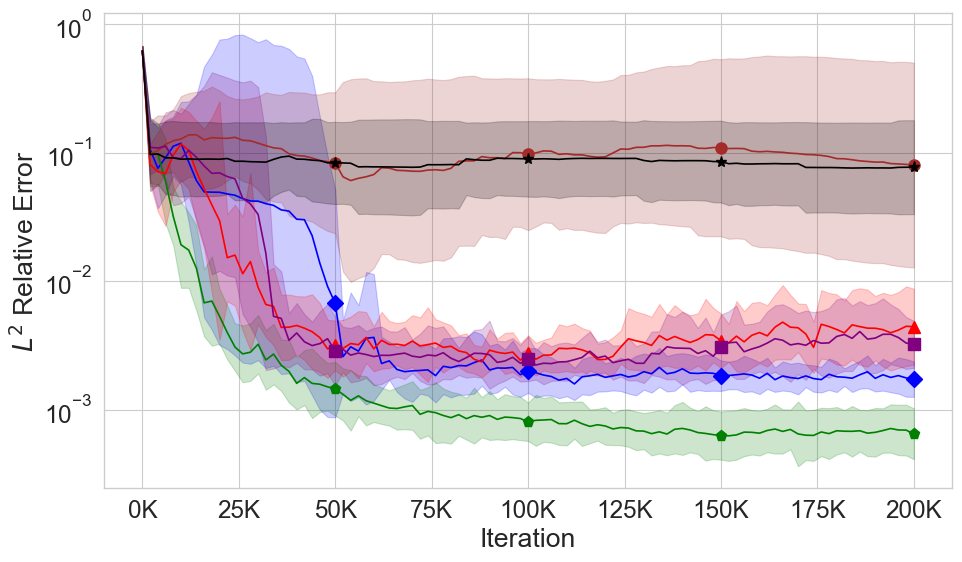

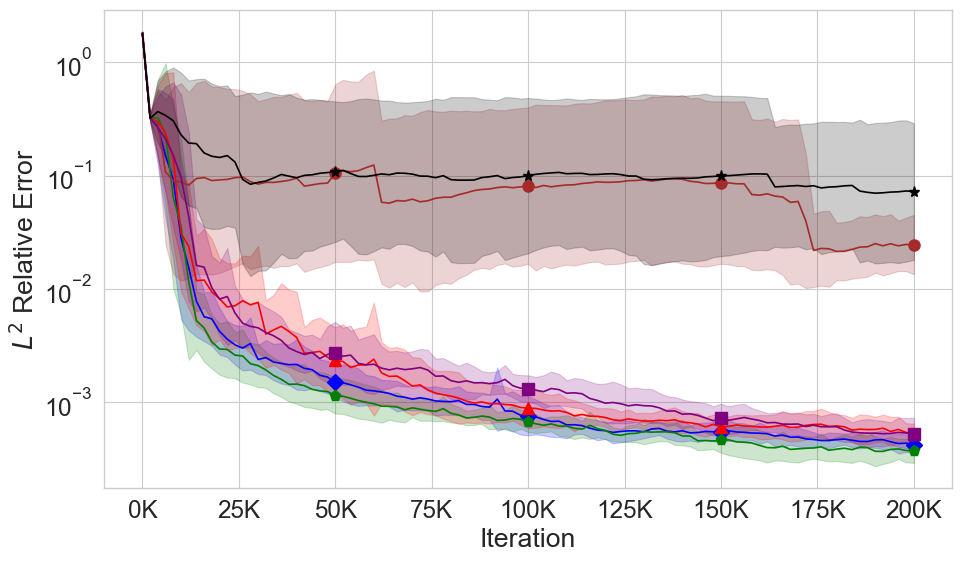

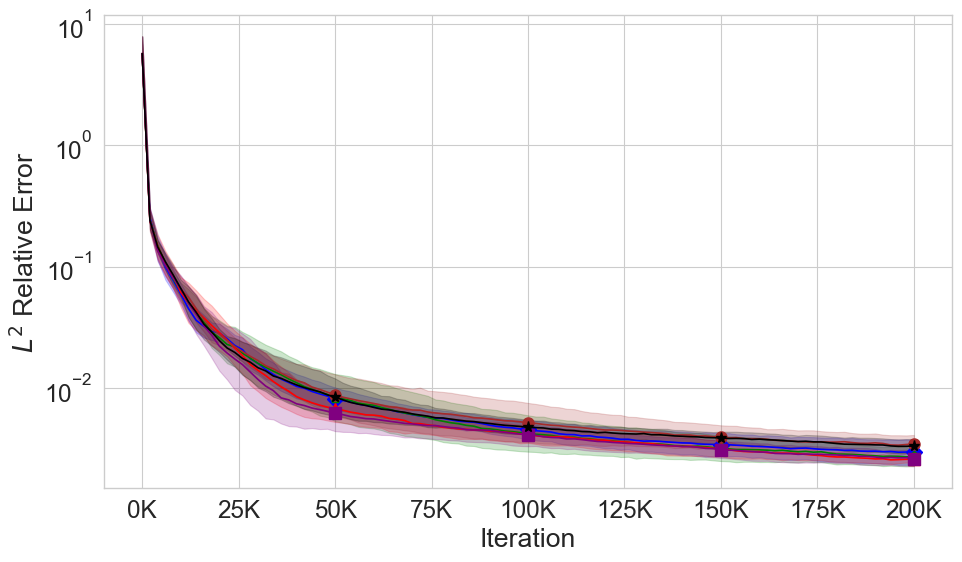

In [4]:
generate_combined_l2_err_plots(
    results=results,
    results_no_resampling=results_no_resampling,
    fig_dir=figpath,
    window=1,
    problems=PROBLEMS['add'],
    params=PARAMS['add'],
)

In [5]:
results_table = {method: {} for method in METHODS}
for problem, _, _ in PROBLEMS['add']:
    df = load_problem(problem, results)
    df_no_resampling = load_problem(problem, results_no_resampling)
    df_no_resampling['Strategy'] = 'Static'

    combined_df = pd.concat([df, df_no_resampling], ignore_index=True)

    metrics = calculate_final_metrics(combined_df, methods=METHODS)

    for method in METHODS:
        results_table[method][problem] = metrics[method]

print(generate_full_latex_table(
    results_table=results_table,
    problems_list=PROBLEMS['add'],
    methods_list=METHODS,
))

\begin{table}[h!]
    \centering
    \label{tab:main_results}
    \begin{tabular}{l|c|c|c|c|c|}
        \toprule
        Method & Diffusion & Allen Cahn & Burgers & Wave & Drift Diffusion Sine \\
        \midrule
{[OOM]} & $[10^{-5}]$ & $[10^{-3}]$ & $[10^{-4}]$ & $[10^{-4}]$ & $[10^{-3}]$ \\
        PINNfluence & $4.3{\scriptstyle \pm 1.5}$ & $6.1{\scriptstyle \pm 2.2}$ & $17.2{\scriptstyle \pm 5.5}$ & $4.2{\scriptstyle \pm 0.7}$ & $3.0{\scriptstyle \pm 0.7}$\\
        RAR & $\mathbf{2.9{\scriptstyle \pm 0.5}}$ & $\mathbf{2.5{\scriptstyle \pm 1.0}}$ & $\mathbf{6.5{\scriptstyle \pm 3.0}}$ & $\mathbf{3.7{\scriptstyle \pm 0.9}}$ & $2.7{\scriptstyle \pm 0.5}$\\
        Grad-Dot & $4.5{\scriptstyle \pm 1.0}$ & $13.9{\scriptstyle \pm 8.5}$ & $44.2{\scriptstyle \pm 30.1}$ & $5.3{\scriptstyle \pm 1.1}$ & $\mathbf{2.6{\scriptstyle \pm 0.2}}$\\
        Out-Grad & $6.3{\scriptstyle \pm 1.3}$ & $11.5{\scriptstyle \pm 3.9}$ & $801{\scriptstyle \pm 1471}$ & $246{\scriptstyle \pm 149}$ & $3.5{\scrip

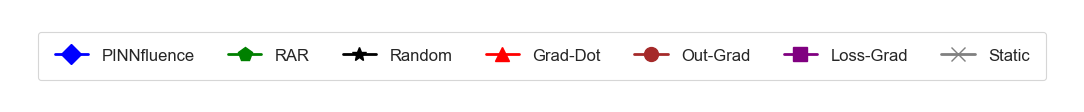

In [6]:
fig, ax = create_standalone_legend()
fig.savefig(figpath / "legend_horizontal_seperate_plots.pdf", bbox_inches='tight')

In [7]:
sns.set_context("paper", font_scale=1.5)
plt.rcParams.update({'font.size': 24})

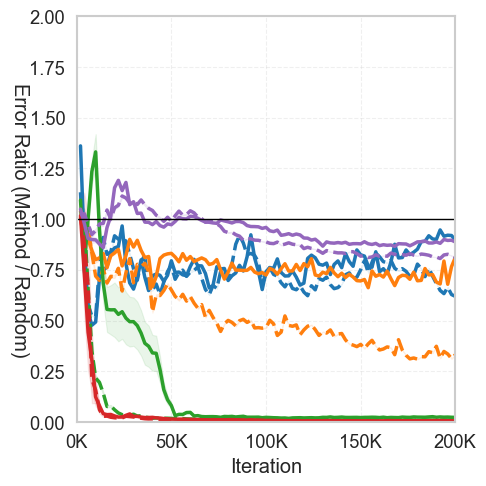

In [8]:
fig, ax = create_combined_plot(results, problems=PROBLEMS['add'], params=PARAMS['add'])
fig.savefig(figpath / "combined_plot.pdf", bbox_inches='tight')

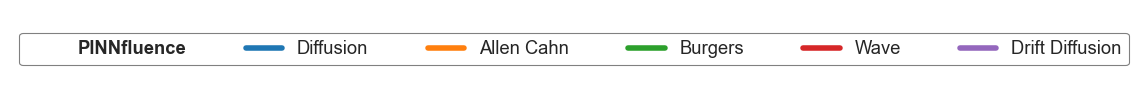

In [9]:
create_separate_legend(
    problem_colors = {
        'diffusion': "#1F77B4",  # Black
        'allen_cahn': "#FF7F0E",  # Blue
        "burgers": "#2CA02C",    # Green
        'wave': "#D62728",        # Red-orange
        'drift_diffusion_sine': "#9467BD",  # Purple
    },
    # Define line styles for different methods
    method_styles = {
        'PINNfluence': '-',
        # 'RAR': '--'
    }
).savefig("./figures/legend_horizontal_combined_plots_pinnfluence.pdf", bbox_inches='tight', dpi=300)

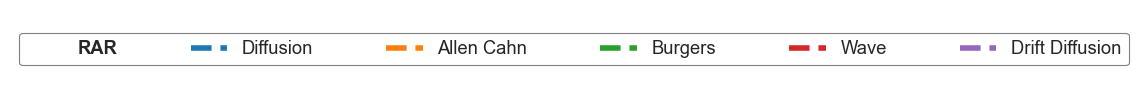

In [10]:
create_separate_legend(
    problem_colors = {
        'diffusion': "#1F77B4",  # Black
        'allen_cahn': "#FF7F0E",  # Blue
        "burgers": "#2CA02C",    # Green
        'wave': "#D62728",        # Red-orange
        'drift_diffusion_sine': "#9467BD",  # Purple
    },
    # Define line styles for different methods
    method_styles = {
        # 'PINNfluence': '-',
        'RAR': '--'
    }
).savefig("./figures/legend_horizontal_combined_plots_RAR.pdf", bbox_inches='tight', dpi=300)

In [11]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=3)

/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:754: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:770: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


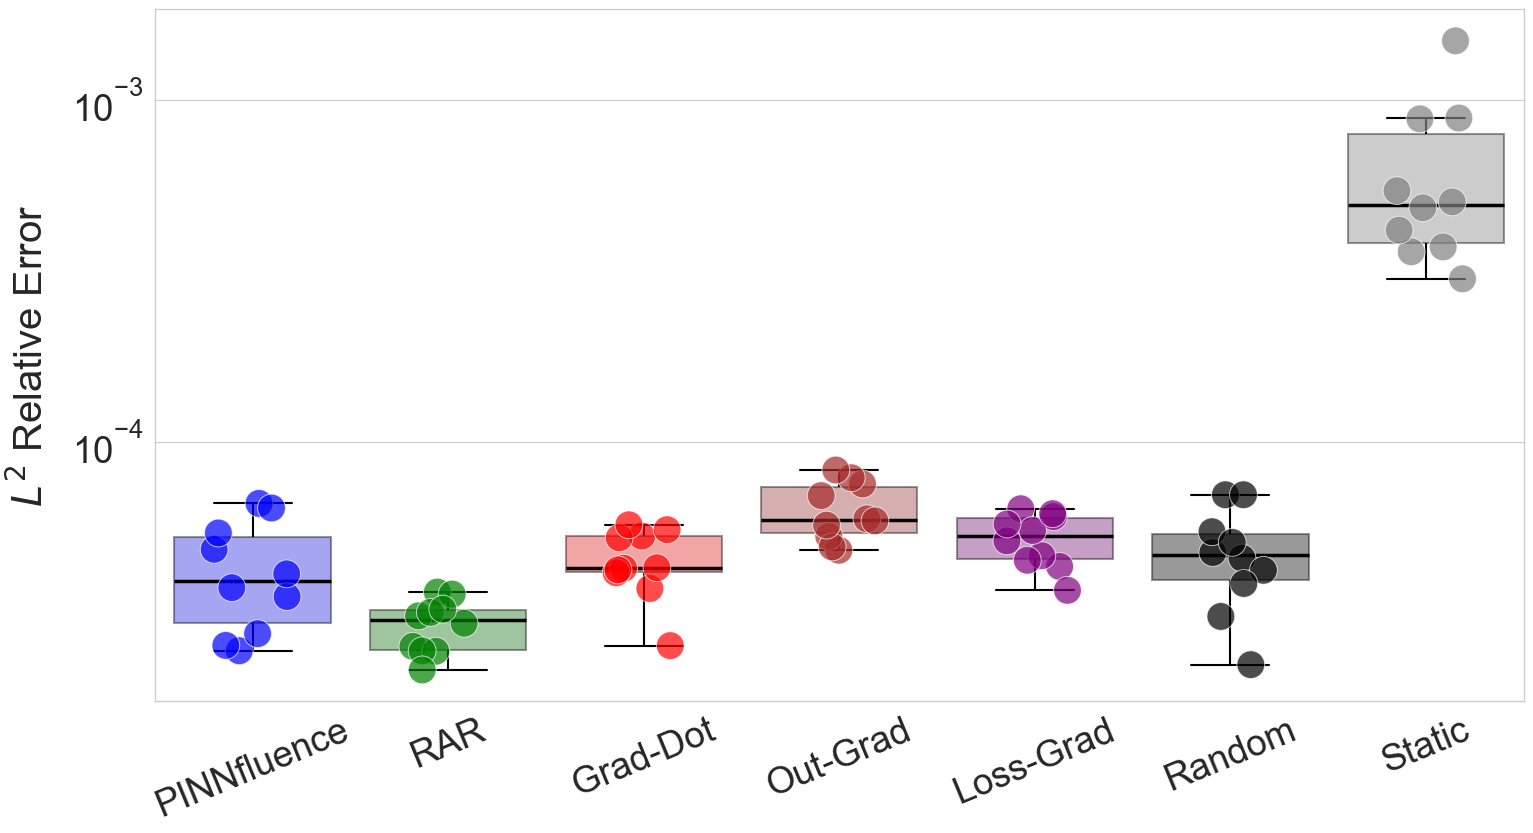

/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:754: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:770: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


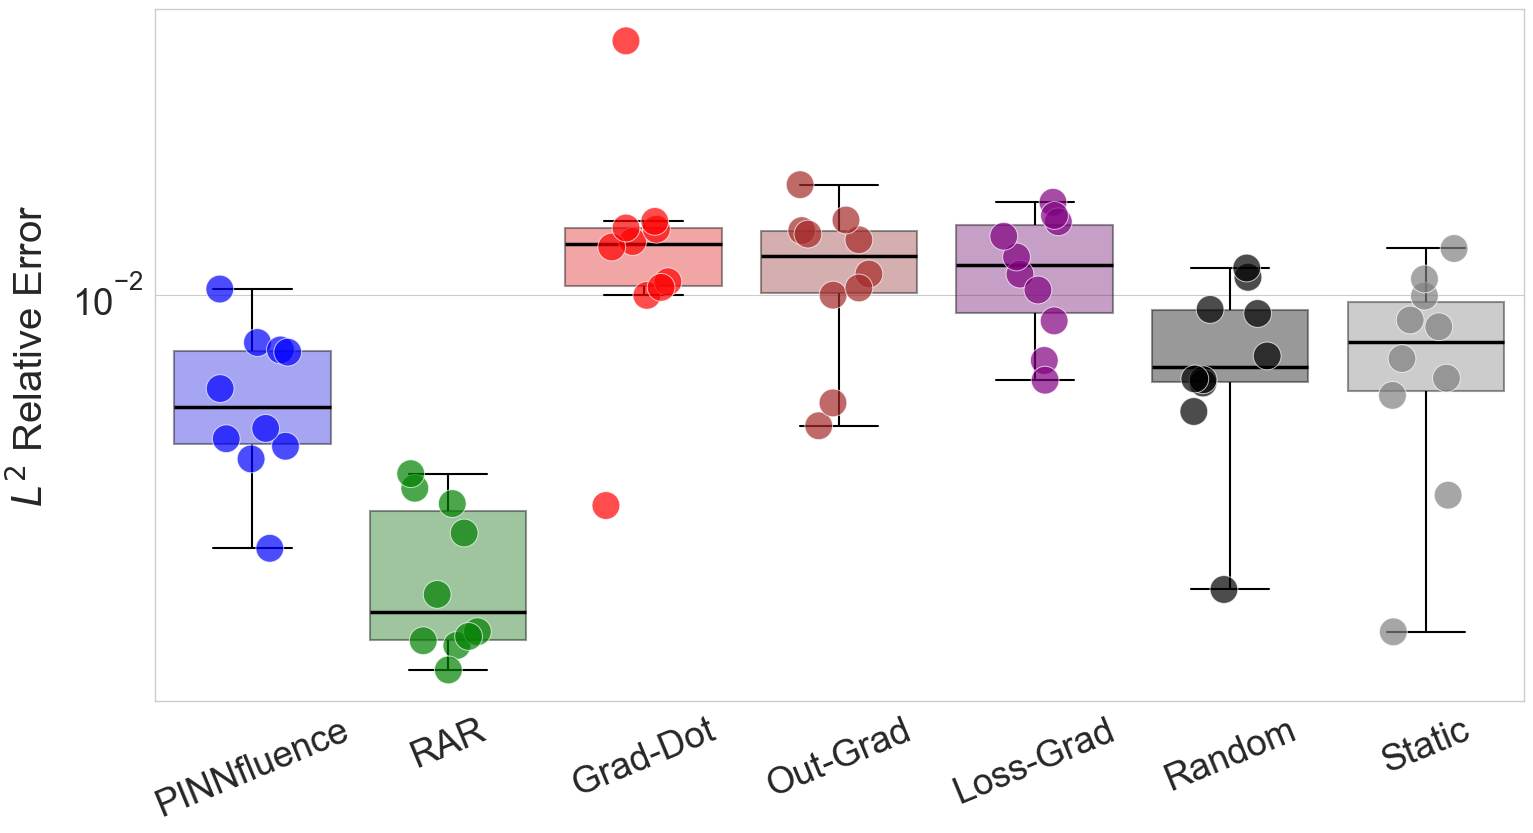

/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:754: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:770: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


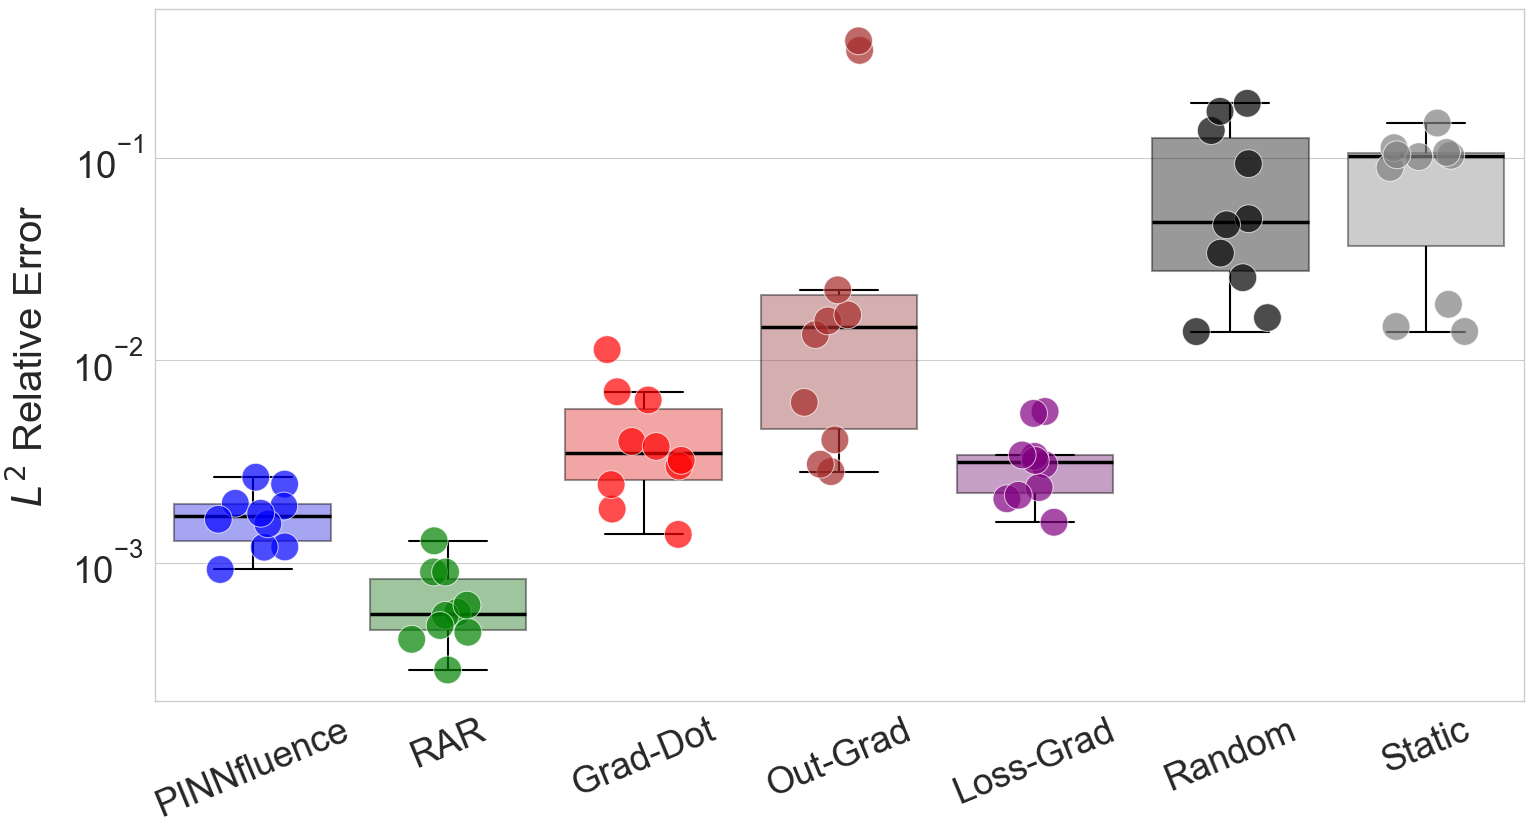

/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:754: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:770: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


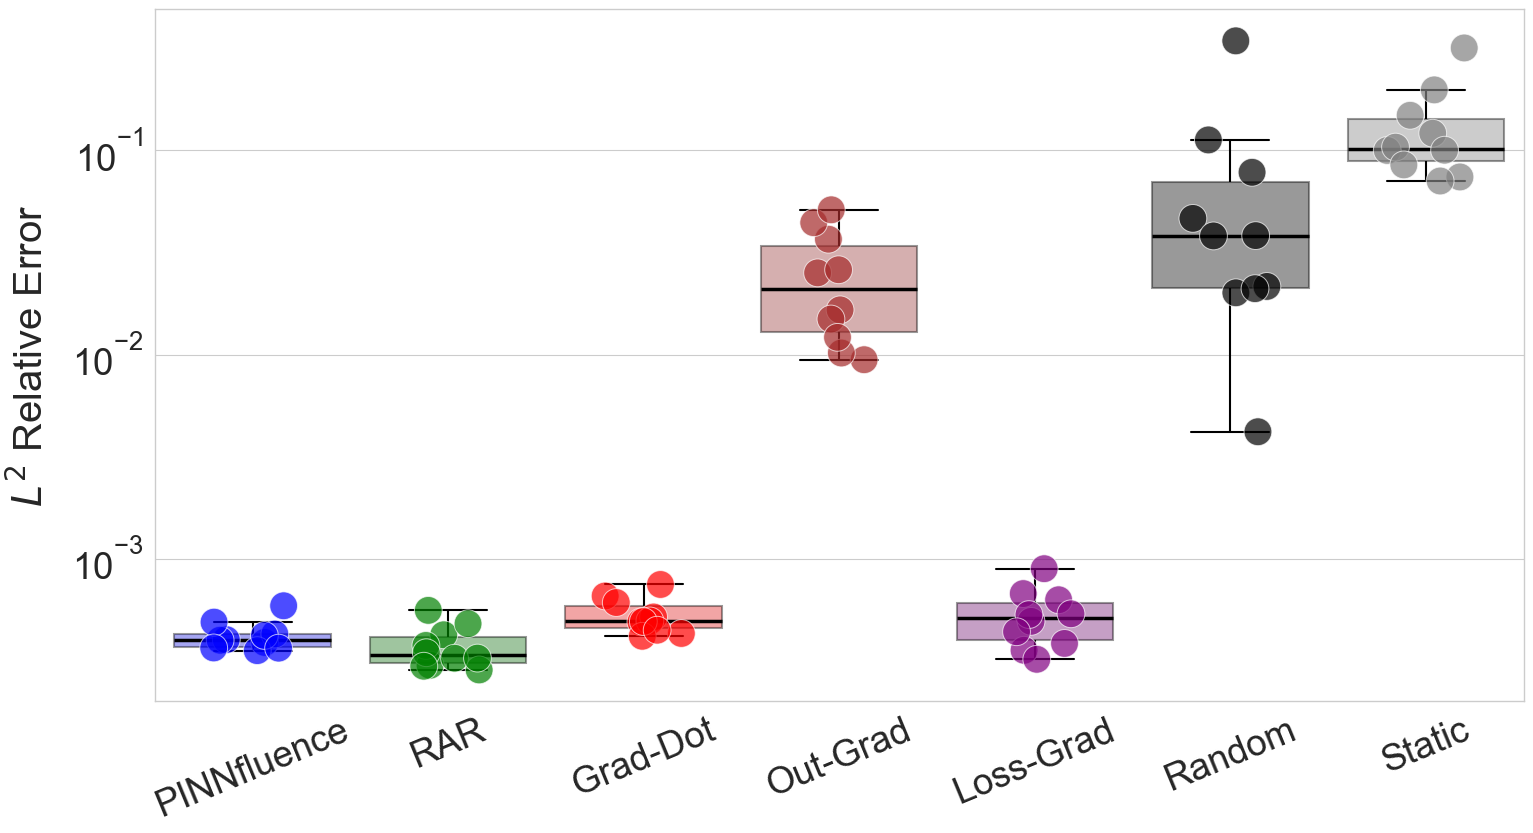

/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:754: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:770: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


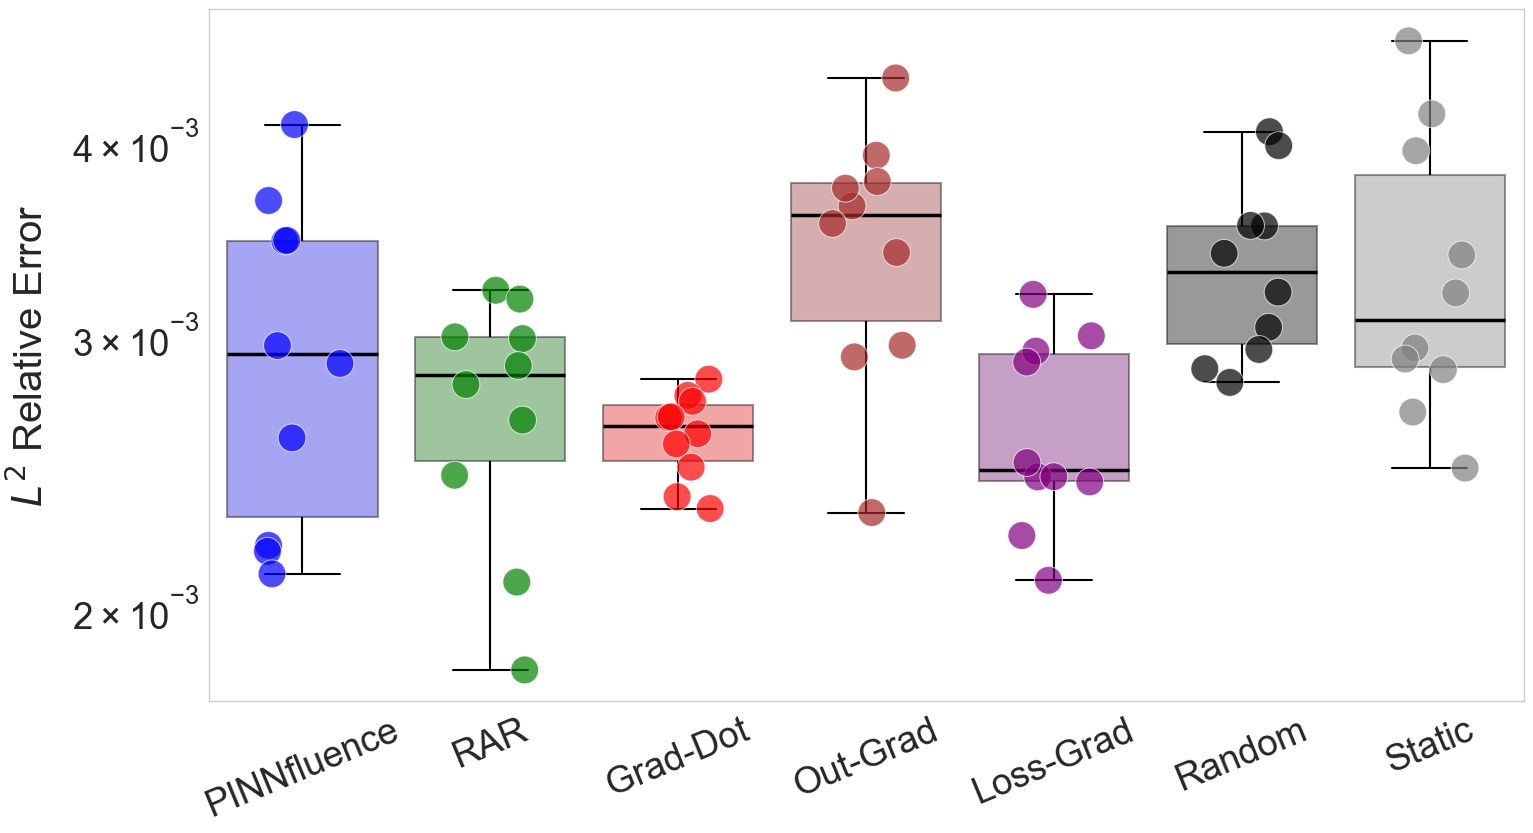

/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:754: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:770: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


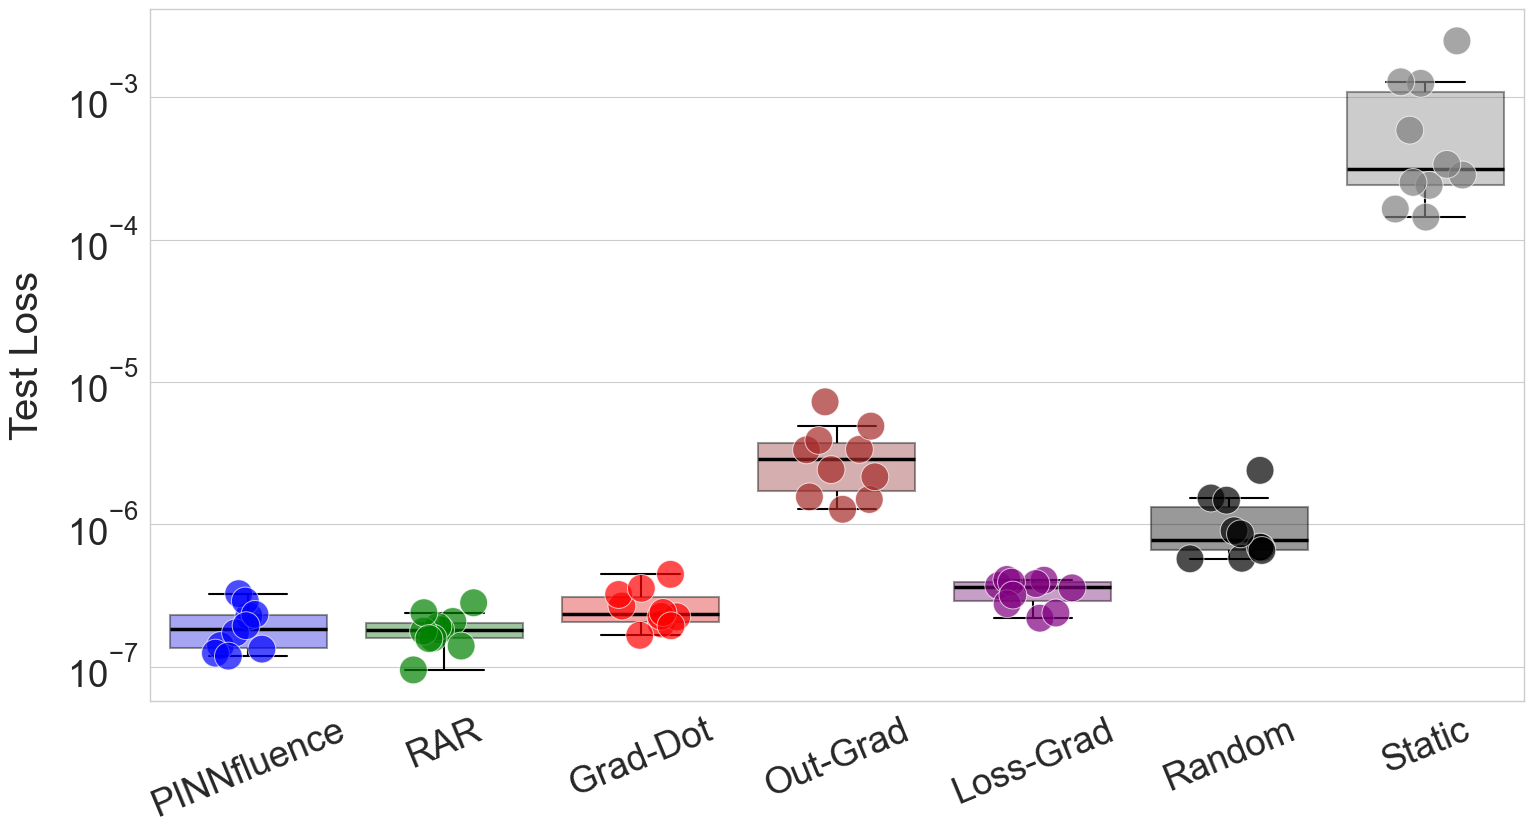

/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:754: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:770: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


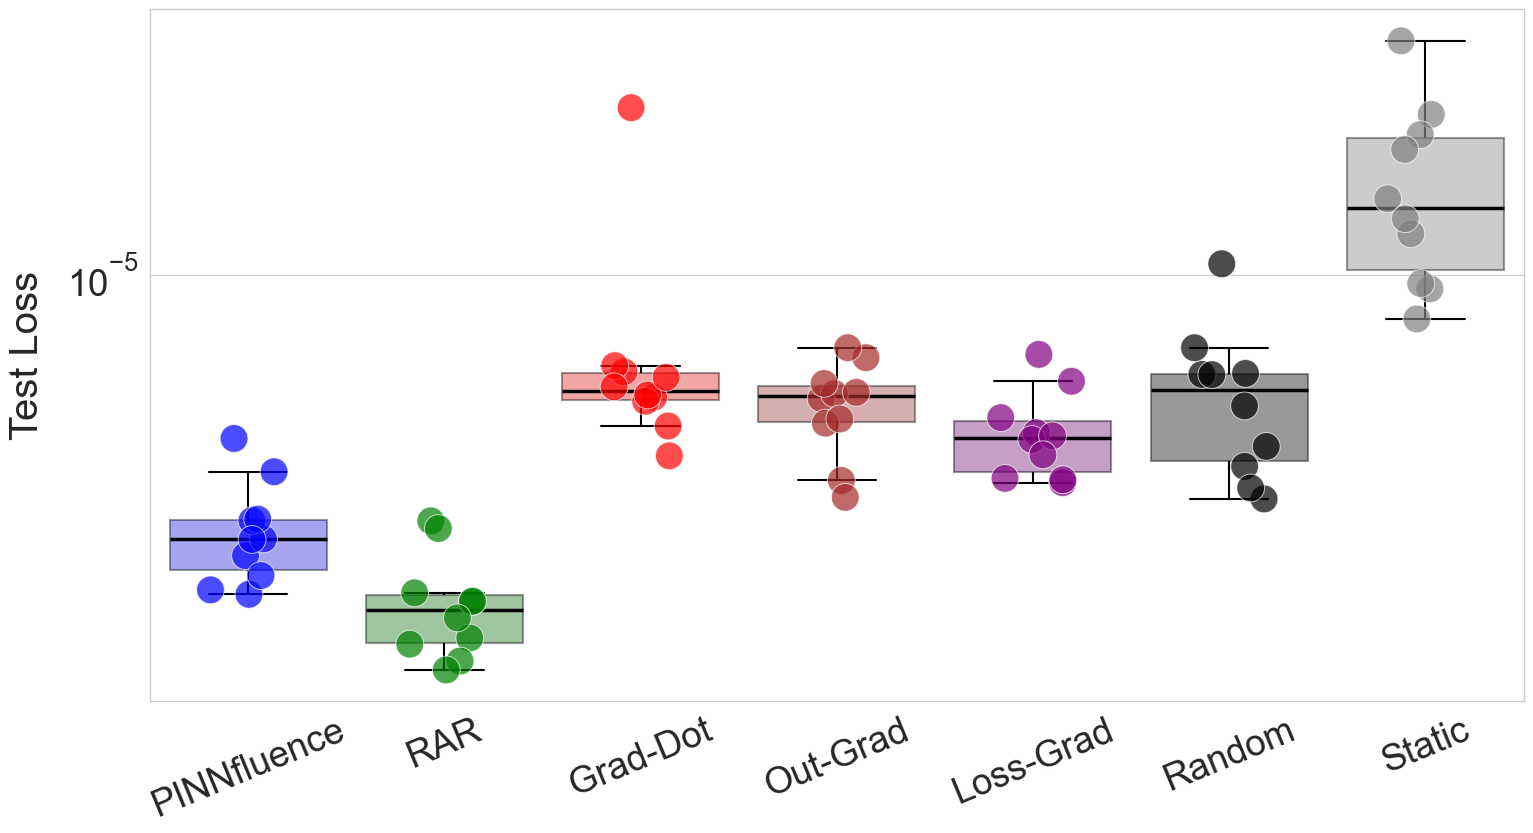

/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:754: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:770: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


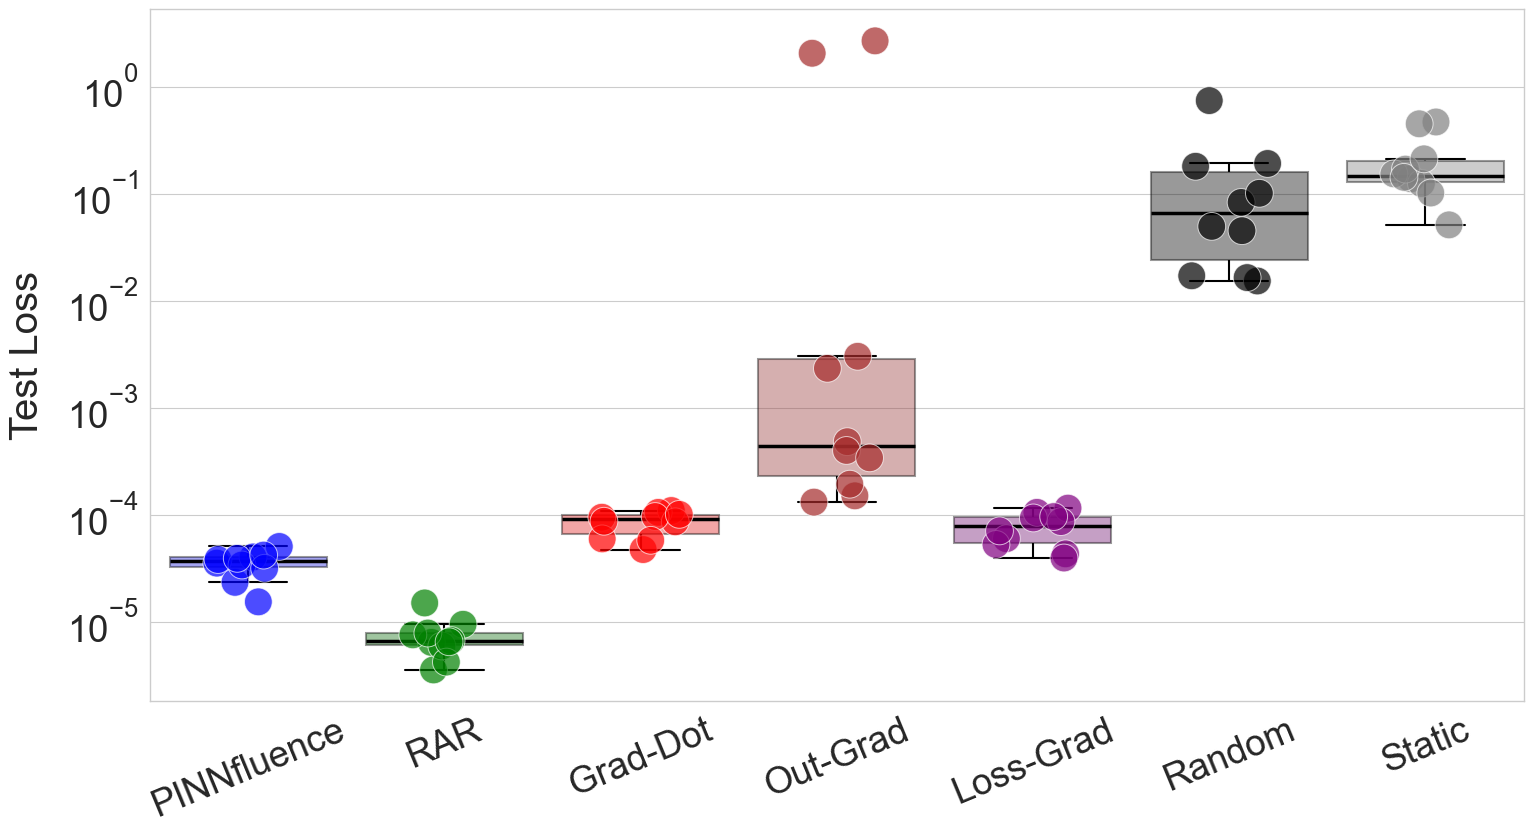

/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:754: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:770: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


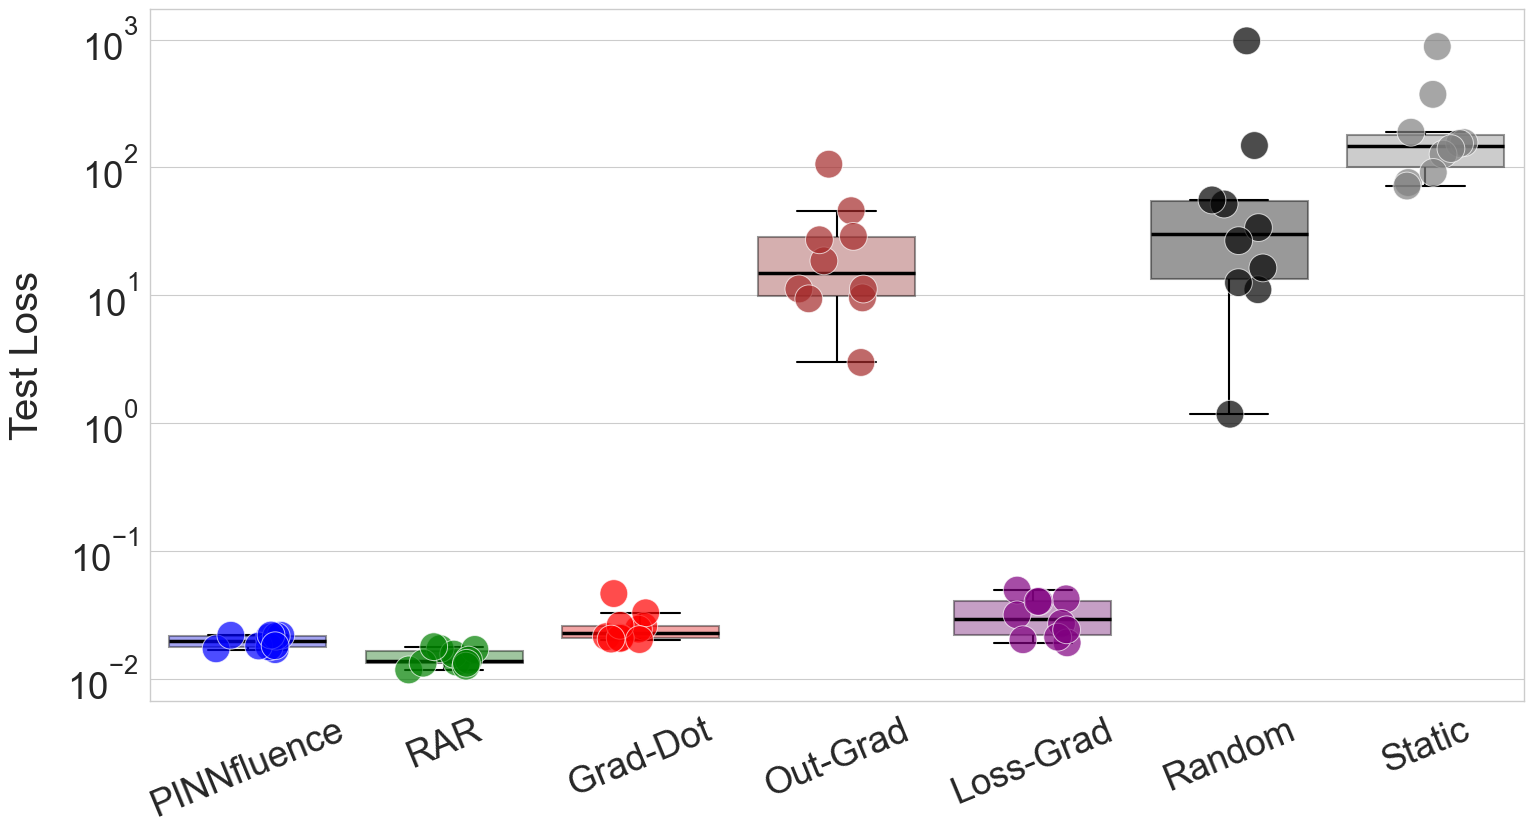

/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:754: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/Users/krasowski/projects/pinnfluence_resampling/.venv/lib/python3.12/site-packages/pinnfluence_resampling/utils/eval_and_plotting_utils.py:770: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


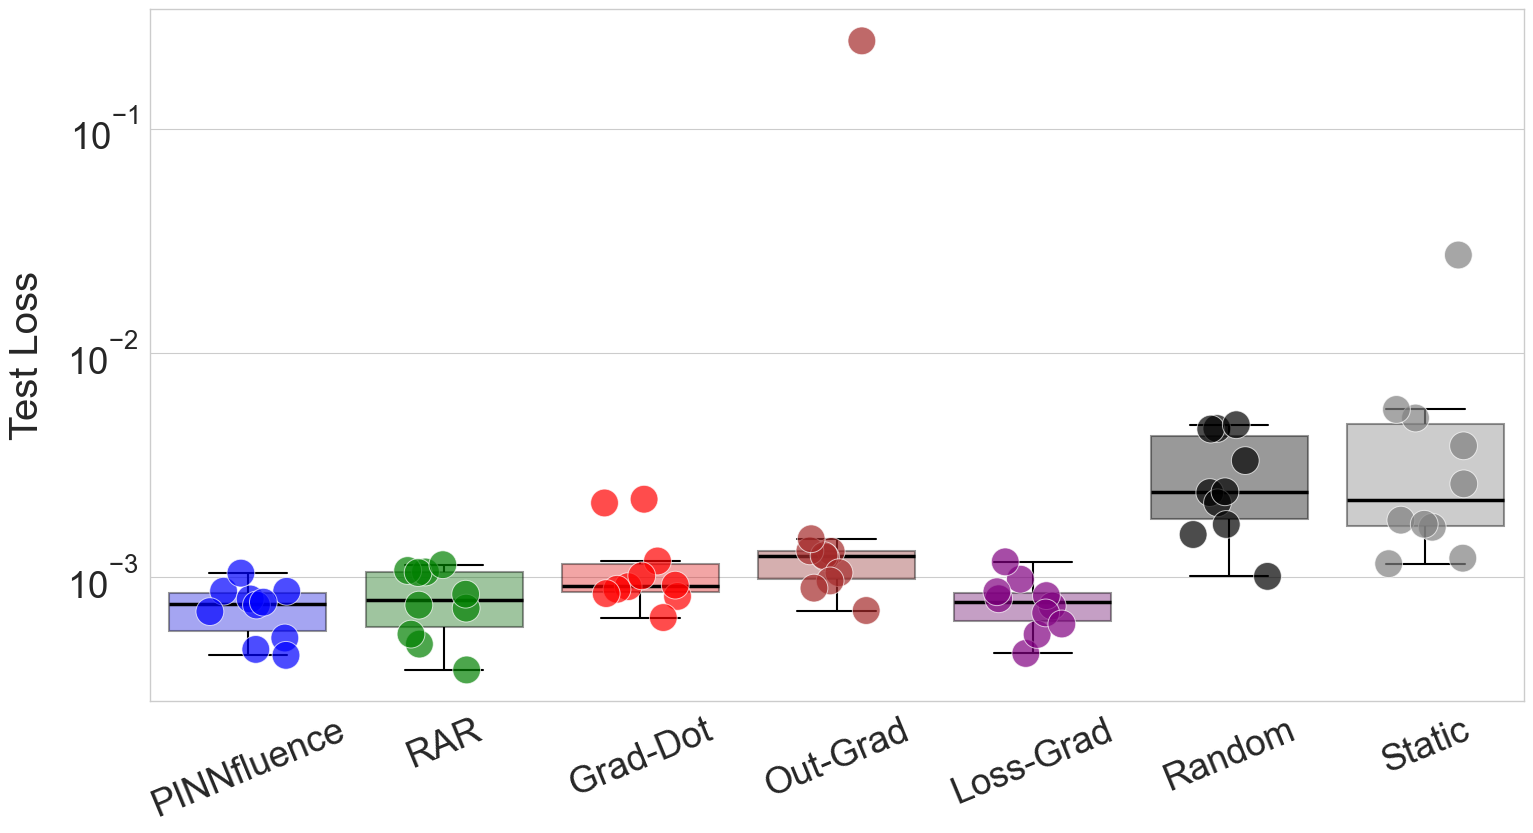

In [12]:
all_dfs = [] 

for problem, _, _ in PROBLEMS['add']:
    df = load_problem(problem, results)
    df_no_resampling = load_problem(problem, results_no_resampling)
    df_no_resampling['Strategy'] = 'Static'

    combined_df = pd.concat([df, df_no_resampling], ignore_index=True)
    combined_df = combined_df.loc[combined_df['Iteration'] == 200000]
    all_dfs.append(combined_df)

df = pd.concat(all_dfs, ignore_index=True)

plot_boxplots(
    df=df,
    metric='L2 Relative Error',
    fig_dir=figpath,
)

plot_boxplots(
    df=df,
    metric='Test Loss',
    fig_dir=figpath,
)